<b> Data science Project 3 </b> <br>

<b> co-ordinator : Teo Susnjak </b> <br>

<b> Group members :<br> Joshua Xu : 19036937 <br>
                     Meet Shah     : 20011945 </b>

 # Abstract
* Evaluating a Jupyter notebook by taking part in the online competition that is on Kaggle Website.
 
* In this notebook we will be taking part in the Kaggle competetion that is <b>M5 Uncertainity</b> and  predicting the score related to the Topic by submitting the notebook on kaggle platform.
 
* Uploading CSV file from kaggle into notebook and perform some Exploratory data analysis(EDA) on the datsets and perform some algorithms.
 
* Three algorithms are evaluated in this notebook: **SVR performs better for validation, but the submission socre is not as good as KNN**. However, SVR is preserved in this notebook for demonstration - it is simple to change only one line of code (which is the name that represent the algorithm) to get a different result of a given algorithm.
 
* Quantiles computing uses a mapping function copy from Kaggle to simplify the computing.

* Calculating the Quantiles by dividing the datasets into two parts that is one is validation and second is evaluation.

## Contents Of Notebook

* <a href='#Introduction'>1. Introduction</a>
* <a href='#library'>2. Importing Libraries</a>
* <a href='#csv'>3. Uploading Csv Files</a>
* <a href='#EDA'>4. EDA - Exploratory data analysis on the datasets</a>
* <a href='#cal'>5. Calender table processing</a>
* <a href='#sel'>6. sales train validation table process</a>
* <a href='#sellpriceprocess'>7.sell price table processing</a>
* <a href='#Algorithms'>8.Modeling and computing with several machine learning algorithms</a>
    * <a href='#AlgorithmComparison'> 8.1.Algorithm Comparison</a>
* <a href='#uncertainity'>9.Calculating uncertainity</a> 
* <a href='#conclusion'>10.Conclusion</a>

<a id='Introduction'></a>
## 1. Introduction
The M5 database, kindly made accessible by Walmart, contains aggregate purchases of different goods distributed in the United States, arranged in the context of time - series data clustered together. More specifically, the dataset includes the unit sales of 3,049 products, categorised into 3 product categories (Hobbies, Foods and Households) and seven item depts, wherein the concepts described above are partitioned.

The goods are distributed in 10 markets, in 3 states (CA, TX, and WI). In this context, the lowest step of a system , i.e. revenues of in-store units may be distributed into various commodity groups or regional territories.

In the competition we have to submit the 28 days ahead point forecast for all the series.Secondly we have to sumit the prediction score for the median and intervals that is 50%, 67%, 95%, and 99%.

In this we can seperate the datasets into 2 parts that is one for validation and second for the evaluation.

In this notebook various EDA techniques been performed on the datasets for better understanding of the data and perform various algorithms on the generated datasets.

By performing various algorithms on the created dataset we can get the predicted values for the sales and uncertainty is been calculated with the help of different source that is  https://www.kaggle.com/kneroma/from-point-to-uncertainty-prediction.

<a id='library'></a>

## 2. Importing libraries
Loading libraries for Kaggle platform

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/m5-forecasting-uncertainty/sample_submission.csv
/kaggle/input/m5-forecasting-uncertainty/sales_train_validation.csv
/kaggle/input/m5-forecasting-uncertainty/sell_prices.csv
/kaggle/input/m5-forecasting-uncertainty/calendar.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from pylab import rcParams
%matplotlib inline


###### Importing libraries for implemetation of notebook without any interruption.

In [3]:
rcParams['lines.linewidth'] = 2
#rcParams['axes.facecolor'] = 'white'
#cParams['patch.edgecolor'] = 'white'                                                  # Applying rc param for clear and visualizable graph.
rcParams['figure.figsize'] = 20,5
rcParams['font.size'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['ytick.labelsize'] = 15

<a id='csv'></a>

## 3. Upolading Csv file from Kaggle

There are four Csv file from the kaggle competition datasets.

In [4]:
folder = "/kaggle/input/m5-forecasting-uncertainty/"
sales_train_validation = pd.read_csv((folder + "sales_train_validation.csv"))
sell_prices = pd.read_csv((folder + "sell_prices.csv"))
calendar = pd.read_csv((folder + "calendar.csv"), parse_dates=['date'])
sample_submission = pd.read_csv((folder + "sample_submission.csv"))


In [5]:
print("shape.stv:", sales_train_validation.shape)
print("shape.cal:", calendar.shape)
print("shape.sp:", sell_prices.shape)
print("shape.ss:", sample_submission.shape)

shape.stv: (30490, 1919)
shape.cal: (1969, 14)
shape.sp: (6841121, 4)
shape.ss: (771120, 29)


In [6]:
sales_train_validation.head(2)

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [7]:
calendar.head(2)

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0


In [8]:
sample_submission.tail(2)

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
771118,FOODS_3_826_WI_3_0.995_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
771119,FOODS_3_827_WI_3_0.995_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
sell_prices.head(2)

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58


In [10]:
sample_submission.tail(2)

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
771118,FOODS_3_826_WI_3_0.995_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
771119,FOODS_3_827_WI_3_0.995_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<a id='EDA'></a>

## 4. EDA  -  exploratory Data Analysis

Exploratory Data Processing, or EDA, is basically a form of statistician narrative. It helps us to discover correlations and observations inside the results, sometimes through visual methods. <br>
This analysis is been performed for retrevivng the most informative feature from the column which can be very useful and can be very understandable for the further coding.

Various type of store ids in the sell prices data set.

Text(0.5, 1.0, 'Various types of store ids')

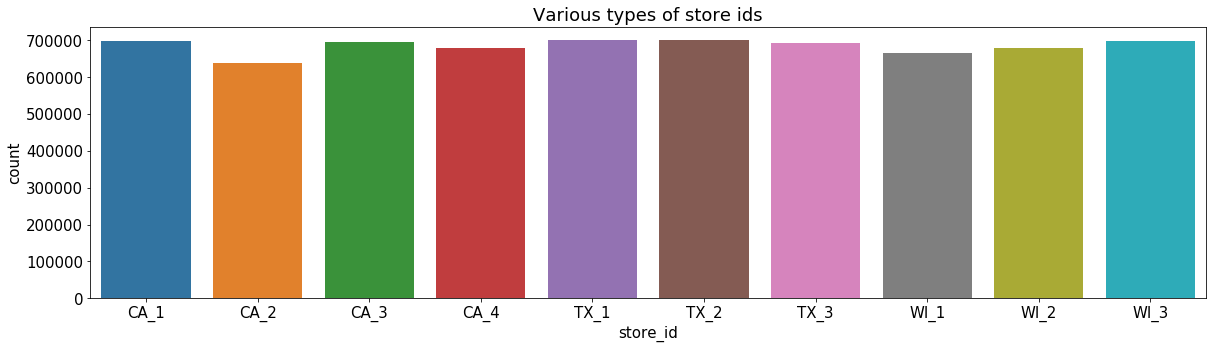

In [11]:
sns.countplot(x='store_id', data=sell_prices)
plt.title('Various types of store ids')

various type of dept ids in the sales train data set.

Text(0.5, 1.0, 'Various types of dept ids')

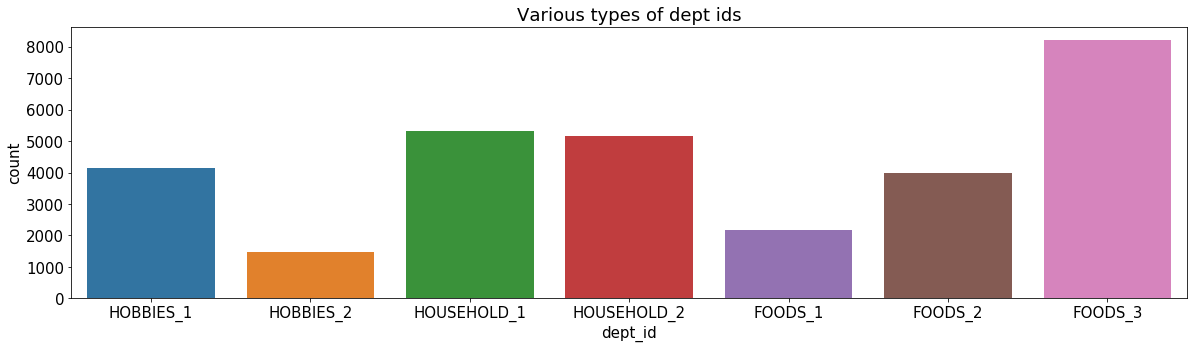

In [12]:
sns.countplot(x='dept_id', data=sales_train_validation)
plt.title('Various types of dept ids')

various type of state ids in the sales train data set.

Text(0.5, 1.0, 'Various types of state ids')

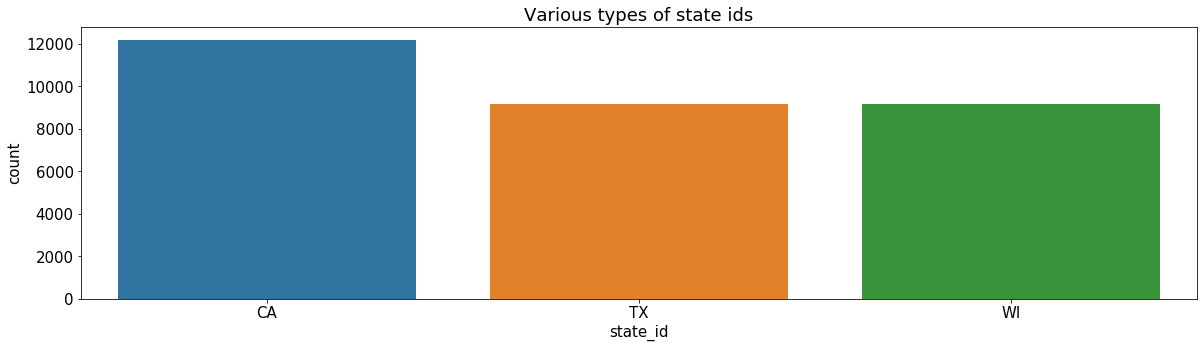

In [13]:
sns.countplot(x='state_id', data=sales_train_validation)
plt.title('Various types of state ids')

No of store ids on the basis of the counts

Text(0, 0.5, 'counts')

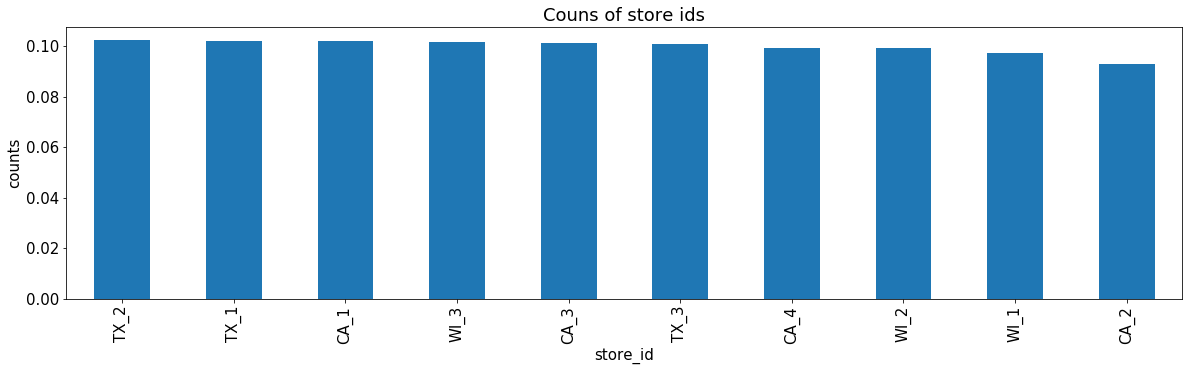

In [14]:
fraud_count = sell_prices.store_id.value_counts(normalize = True)
fraud_count.plot(kind='bar')
plt.title('Couns of store ids')
plt.xlabel('store_id')
plt.ylabel('counts')

## visualising one of the feature of the calendar that is state

Text(0.5, 1.0, 'variants of snap_CA')

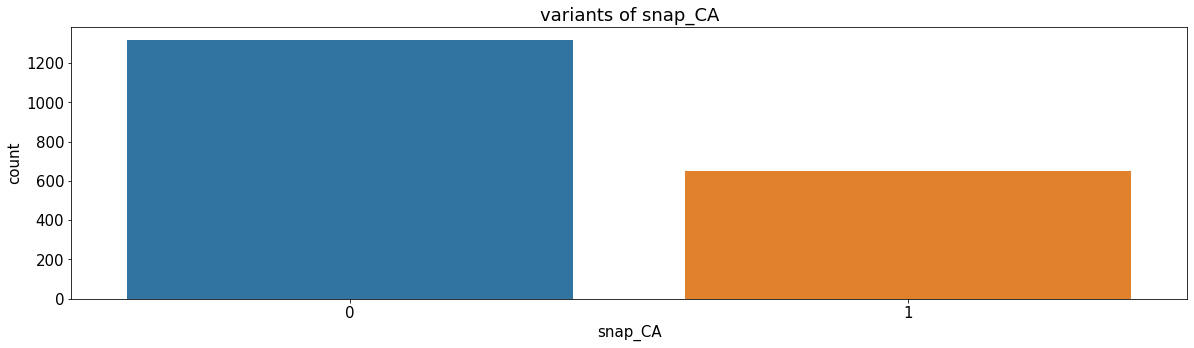

In [15]:
sns.countplot(x='snap_CA', data=calendar)
plt.title('variants of snap_CA')

Getting count of TX and WI from the calendar table.

Text(0, 0.5, 'Count')

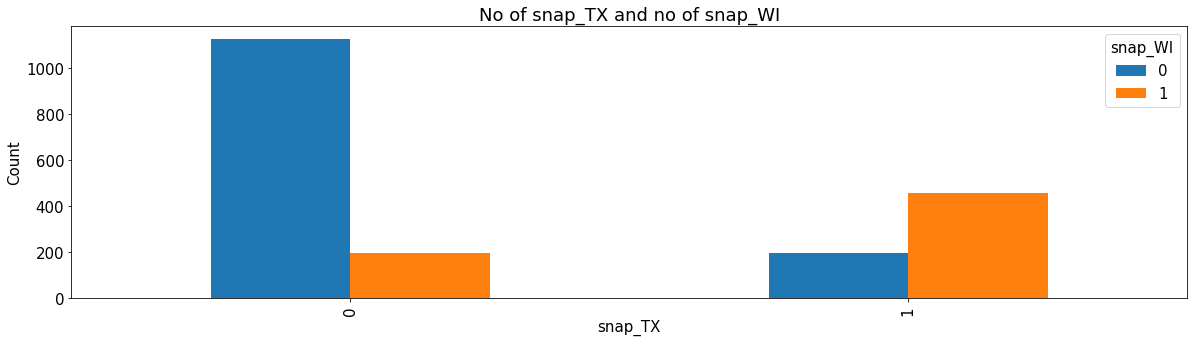

In [16]:
pd.crosstab(calendar.snap_TX,calendar.snap_WI).plot(kind='bar')
plt.title('No of snap_TX and no of snap_WI')
plt.ylabel("Count")

<a id='cal'></a>

## 5. Calendar table preprocessing
* in this table, we will only choose the numeric columns as our traning features;
* a copy of the table will be created for manipulation, the orignal table will keep without touch as the propotype in case of futher analysis;
* normalise the numbers.

###### There are five features that can be predicated by the column days differently

In [17]:
scaler = MinMaxScaler()
calendar_features = ['wday', 'month', 'snap_CA', 'snap_TX', 'snap_WI']
calendar_copy = calendar.copy()[calendar_features]
calendar_copy.iloc[0:1913,:] = scaler.fit_transform(calendar_copy.iloc[0:1913,:])
calendar_copy.iloc[1913:,] = scaler.transform(calendar_copy.iloc[1913:,])
print(calendar_copy.shape)
calendar_copy.head(2)

(1969, 5)


,wday,month,snap_CA,snap_TX,snap_WI
0,0.000000,0.0,0.0,0.0,0.0
1,0.166667,0.0,0.0,0.0,0.0


  <a id='sel'></a>
# 6. sales_train_validation table preprocessing
* Seperate numeric columns and object columns since only numeric columns will be used as traning features while object columns in this table will be used for different level of aggregations;
* To simplify the numeric columns, we change the name of columns to numbers (0~1912), represent day 1~1913;
* We add 56 columns to represent the 56 predcit days, so there will be 1969 numeric colums （days).

In [18]:
column_days = [d for d in sales_train_validation.columns if d.startswith('d_')]
column_ids = [d for d in sales_train_validation.columns if not d.startswith('d_')]
dict_days = {k:v for k, v in zip(column_days, range(1913))}
#stv_table = sales_train_validation.copy()
sales_train_validation.rename(columns= dict_days, inplace=True)
for i in range(1913, calendar.shape[0]):
    sales_train_validation[i] = 0
print(sales_train_validation.shape)
sales_train_validation.head(3)

(30490, 1975)


,id,item_id,dept_id,cat_id,store_id,state_id,0,1,2,3,...,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


  <a id='sellpriceprocess'></a>
# 7.  sell_price table processing

let's process the sell_price table:
* The first thing we need to do is change weekly based table to daily based table
The sell_price table is weekly based, any item's price is the same in the 7 days in a given week. What't we need to do here is try to convert weekly table to daily. The simplest way to do this transition it just copy the table 7 times.

* Secondly, we try to transform the table format or pattern to the same as sales_train_validation, so that we can do the same groupby or aggregation operation.
here we use pandas pivot_table and transpose to change the table pattern. notice that sales_train_validation only have 1969 days' record. Accordingly, the sell_prices table will only keep 1969 days' prices.

In [19]:
sell_prices['id'] = sell_prices.item_id + '_' + sell_prices.store_id  + '_validation'
sell_prices = sell_prices.pivot_table(index='wm_yr_wk', columns='id', values='sell_price')

#fill NaN with 0
sell_prices.fillna(0, inplace=True)
#change weely data to daily
sell_prices = pd.concat([sell_prices] * 7).sort_index()       ##---------------->Processing 7 times
# replace index as numbers from 0, keep index simple
sell_prices.index = range(len(sell_prices))
# only reserve 1969 days records
sell_prices.drop(index=range(1969,len(sell_prices)), inplace=True)

# resort the colomns index to match the sell_prices table
sell_prices = sell_prices[sales_train_validation.id]
#transpose sell_prices table, to be the same shape of sales_train_validation
sell_prices = sell_prices.transpose()
sell_prices.reset_index(inplace=True)
print(sell_prices.shape)
sell_prices.head(2)

(30490, 1970)


,id,0,1,2,3,4,5,6,7,8,...,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968
0,HOBBIES_1_001_CA_1_validation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.38,8.38,8.38,8.38,8.38,8.38,8.38,8.38,8.38,8.38
1,HOBBIES_1_002_CA_1_validation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.97,3.97,3.97,3.97,3.97,3.97,3.97,3.97,3.97,3.97


* Thirdly, we add same columns that sales_train_validation has. 

In [20]:
'''generate item_id	dept_id	cat_id	store_id	state_id	#
notice that on the previous step, the  sell_prices.id == sales_train_validation.id, so we can just copy all the colums in column_ids
sell_prices['item_id'] = sales_train_validation.item_id
sell_prices['dept_id'] = sales_train_validation.dept_id
sell_prices['store_id'] ...'''

sell_prices = sell_prices.merge(right=sales_train_validation[column_ids], on='id')
sell_prices = sell_prices[column_ids + list(range(1969))]
print(sell_prices.shape)
sell_prices.head(2)

(30490, 1975)


,id,item_id,dept_id,cat_id,store_id,state_id,0,1,2,3,...,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0.0,0.0,0.0,0.0,...,8.38,8.38,8.38,8.38,8.38,8.38,8.38,8.38,8.38,8.38
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0.0,0.0,0.0,0.0,...,3.97,3.97,3.97,3.97,3.97,3.97,3.97,3.97,3.97,3.97


*** Now, the sell_prices table has exactly the same size and same pattern as sales_train_validation. We finish the preprocessing of sell_prices table.
*** Next 

# sample_submission preprocessing

In [21]:
sample_submission = sample_submission.set_index('id').astype('float') #-------------. Converting into Float

<a id='Algorithms'></a>

# 8. Model Building & Computing
1. First, we will try to compare several different algorithms to find the best alogorithm as well as the parameters.
2. In order to compare, we write a function to aggregate all algorithms;
3. multiprocess is used to accelerate the validation process.
4. we will only try to predict 1000 items at level 12 aggregation (aggregate with 'id') and computing the MSE (mean_squared_error) to figure out which alogorithm is and what the best parameters are.

In [22]:
from sklearn import svm
#from xgboost import XGBRegressor

def Algorithm (algorithm, X_train, y_train, X_test, **kw):
    
    def KNR(X_train, y_train, X_test, n_neighbors, weights):
        model = KNeighborsRegressor(n_neighbors, weights)
        model.fit(X_train,y_train)
        return model.predict(X_test)

    def RFR(X_train, y_train, X_test, n_estimators=100):
        model = RandomForestRegressor(n_estimators=100)
        model.fit(X_train, y_train)
        return model.predict(X_test)
    
    def SVR(X_train, y_train, X_test, kernel='linear'):
        model = svm.SVR(kernel=kernel)
        model.fit(X_train, y_train)
        return model.predict(X_test)
    
#     def XGBR(X_train, y_train, X_test, n_estimators=500):
#         model = XGBRegressor(n_estimators=500)
#         model.fit(X_train, y_train)
#         return model.predict(X_test)


    if algorithm == 'KNeighborsRegressor':
        if 'n_neighbors' in kw:
            n_neighbors = kw['n_neighbors']
        else:
            n_neighbors = 5
        if 'weights' in kw:
            weights = kw['weights']
        else:
            weights = 'uniform'
        return KNR(X_train, y_train, X_test, n_neighbors, weights)
    
    elif algorithm == 'RandomForestRegressor':
        return RFR(X_train, y_train, X_test)
    
    elif algorithm == 'SVR':
        return SVR(X_train, y_train, X_test)
    
    else:
        return ValueError("input wrong algorithm name")
#     if algorithm == 'XGBRegressor':
#         return XGBR(X_train, y_train, X_test)


The following function willl generate X_train, X_test, y_train and y_test: 
* X_train and X_test will be the shape of (n_samples, n_features). "samples" will be the training days, and "features" will be get from calendar and sell_prices.
* Notice here the shape of y_train and y_test will be (n_samples, n_items), this is not suitable for any Algorithm, so we need to do more before traning. However, here we just get the entire table.

In [23]:
def traning_data_generate(level, TRAIN_LEN=1913):
    #extract training data from sell_prices, include "TRAIN_LEN" samples and n features 
    #extract training data from sales_train_validation: y_train
    # different level has different aggregation policy
    if level == 1:
        stv_level = pd.DataFrame(sales_train_validation.sum(numeric_only=True))
        sp_level = pd.DataFrame(sell_prices.sum(numeric_only=True))
        
    else:
        mapping = level_groupby[level]
        stv_level = sales_train_validation.groupby(by=mapping).sum(numeric_only=True)
        sp_level = sell_prices.groupby(by=mapping).sum(numeric_only=True)  
        #traspose the sell_prices table (n_features, n_samples) to (n_samples, n_features)
        stv_level = stv_level.T
        sp_level = sp_level.T
    
    X_train = sp_level.iloc[0:TRAIN_LEN]
    X_test = sp_level.iloc[TRAIN_LEN:TRAIN_LEN+DAY]

    #traspose the sales_train_validation table (n_features, n_samples) to (n_samples, n_features)   
    y_train = stv_level.iloc[0:TRAIN_LEN]
    y_test = stv_level.iloc[TRAIN_LEN:TRAIN_LEN+DAY]
    
    return X_train, X_test, y_train, y_test

The "computing_fuc" function is used to generate y_predict, wich is the exact number of sales for items:
* this function will feed for multi-process, the iterable varible is "times", which is used for seperating items into several parts (the number of parts equals the cpu cores). In this way, one process per core, will utilise the cpu most.
* in order to be abstract, we add keyword parameters to adapt different algorithms.
* every "item" will be predicted (56 days) seperately and then merge into a dataframe

In [24]:
def computing_fuc(times, algorithm, **kw):
    frame = pd.DataFrame(index=range(DAY))

    # train and predict every item of all 56 days seperately
    for column in  y_train.columns[multi_index[times]]      :
        #concat the traning data from calendar and sell_prices
        X_train_column = np.c_[X_train[column].values, cld_train_array]
        X_test_column = np.c_[X_test[column].values, cld_test_array]
        
        frame[column] = Algorithm(algorithm, X_train_column, y_train[column].values, X_test_column, **kw)

    return frame

<a id='AlgorithmComparison'></a>
### 8.2.  Algorithm Comparison
* First, let's do a simple test to validate the accuracy of different regressors, thus we can dicide which algorithm will perform better in the datasets. The comparable algorithms are "Random Forest", "KNN", "SVR".
* Regarding KNN, we test different parameters.

In [25]:
import multiprocessing as mp
from sklearn.metrics import mean_squared_error
from functools import partial

DAY = 56
# all the id information stored in a dict
info_dict = {k:sales_train_validation[k].unique() for k in sales_train_validation.columns[0:6]}

level_groupby = {12: 'id',
                 11: ['state_id','item_id'], 
                 10: 'item_id',
                 9: ['store_id', 'dept_id'],
                 8: ['store_id', 'cat_id'],
                 7: ['state_id', 'dept_id'],
                 6: ['state_id', 'cat_id'],
                 5: 'dept_id',
                 4: 'cat_id',
                 3: 'store_id',
                 2: 'state_id',
                 1: None
                }

func_KNN_uniform_n3 = partial(computing_fuc, algorithm='KNeighborsRegressor', n_neighbors=3, weights='uniform')
func_KNN_uniform_n5 = partial(computing_fuc, algorithm='KNeighborsRegressor', n_neighbors=5, weights='uniform')
func_KNN_distance_n3 = partial(computing_fuc, algorithm='KNeighborsRegressor', n_neighbors=3, weights='distance')
func_KNN_distance_n5 = partial(computing_fuc, algorithm='KNeighborsRegressor', n_neighbors=5, weights='distance')
func_SVR = partial(computing_fuc, algorithm='SVR')
func_RFR = partial(computing_fuc, algorithm='RandomForestRegressor')
#func_XGBR = partial(computing_fuc, algorithm='XGBRegressor')

func_dict = {
    'KNN_uniform_n3':func_KNN_uniform_n3, 
    'KNN_uniform_n5':func_KNN_uniform_n5, 
    'KNN_distance_n3': func_KNN_distance_n3,
    'KNN_distance_n5': func_KNN_distance_n5,
    'RandomForestRegressor': func_RFR,
    'SVR': func_SVR,
    #'XGBRegressor': func_XGBR  
}

cpu_cores = mp.cpu_count()
TRAIN_LEN = 1913-56
times = list(range(cpu_cores))
level = 12
total_len = 1000
multi_index = [range(round(time* total_len / cpu_cores), round((time + 1)* total_len / cpu_cores)) for time in times]
# multi_index = [list(range(split_len)), list(range(split_len, split_len * 2)), 
#                    list(range(split_len * 2, split_len * 3)), list(range(split_len * 3,total_len))]
list_mse_score = {}


#extract part of the X_train from calendar table, include "TRAIN_LEN" samples and 5 features
cld_train_array = calendar_copy.values[0:TRAIN_LEN] 
#extract part of the X_test from calendar table, include "DAY" samples and 5 features
cld_test_array = calendar_copy.values[TRAIN_LEN:TRAIN_LEN+DAY]
scaler = MinMaxScaler()
scaler.fit(cld_train_array)
cld_train_array = scaler.transform(cld_train_array)
cld_test_array = scaler.transform(cld_test_array)


X_train, X_test, y_train, y_test = traning_data_generate(level, TRAIN_LEN)
columns=X_train.columns
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=columns)


In [26]:
for name, partial_func in func_dict.items():
    with mp.Pool(processes=cpu_cores) as pool:
        results = pool.map(partial_func, times)
        
    temp_frame = pd.concat(results, axis=1)
    list_mse_score[name] = mean_squared_error(temp_frame.values, y_test[temp_frame.columns].values)

list_mse_score

{'KNN_uniform_n3': 10.46479365079365,
 'KNN_uniform_n5': 9.392115714285715,
 'KNN_distance_n3': 10.899038351435976,
 'KNN_distance_n5': 10.249954531876318,
 'RandomForestRegressor': 8.571925854690631,
 'SVR': 8.778320990091222}

### From the result, 
* For KNeighborsRegressor, it seems that the parameters n_neighbors=3, weights='distance' will get the best result
* it seems that SVR with default parameters has the best performance when use the last part (56days) of the existing training data as validation data.

# So, in the next steps, we will try to use the SVR with default parameters in the real test.
* ### First, we regenerate the training features and samples, notice here the sample length changes to 1913. 

In [27]:
TRAIN_LEN = 1913

#extract part of the X_train from calendar table, include "TRAIN_LEN" samples and 5 features
cld_train_array = calendar_copy.values[0:TRAIN_LEN] 
#extract part of the X_test from calendar table, include "DAY" samples and 5 features
cld_test_array = calendar_copy.values[TRAIN_LEN:TRAIN_LEN+DAY]
scaler = MinMaxScaler()
scaler.fit(cld_train_array)
cld_train_array = scaler.transform(cld_train_array)
cld_test_array = scaler.transform(cld_test_array)

* # The code below is the core part. It is similar to the comparison code above: use multi-process to accelerate computing.
* # The for loop is to put all levels' aggregation together, run regression, and get predict results.
* # Since we use multi-process, here we seperate samples into "cpu_cores" parts, even if the samples are fewer thant cpu_cores, it is still avaible. The reason is that the list (multi_index) could have [] - empty in it.  
* # follow the pattern of "sample_submission", we will generate the index of the DataFrame in level order.

### The aggregation patterns:
* pattern_L12 = '_'.join([item_id, store_id, 'validation'])
* pattern_L11 = '_'.join([state_id, item_id, 'validation'])
* pattern_L10 = '_'.join([item_id, 'X', 'validation'])
* pattern_L9 = '_'.join([store_id, dept_id, 'validation'])
* pattern_L8 = '_'.join([store_id, cat_id,  'validation'])
* pattern_L7 = '_'.join([state_id, dept_id,  'validation'])
* pattern_L6 = '_'.join([state_id, cat_id, 'validation'])
* pattern_L5 = '_'.join([dept_id, 'X',  'validation'])
* pattern_L4 = '_'.join([cat_id, 'X', 'validation'])
* pattern_L3 = '_'.join([store_id, 'X', 'validation'])
* pattern_L2 = '_'.join([state_id, 'X','validation'])
* pattern_L1 = '_'.join(['Total', 'X', 'validation'])

The code is divided into two parts validation and evaluation so we need to separate the implementation into two parts:
* In the code below we have separated the frame into the 2 parts;
* First frame is for the "validation" and second frame is for the "evaluation".
* ## Just change the name passed to pool.map() will alter to another algorithm.

In [28]:
frame_without_quantile = pd.DataFrame(columns=range(DAY))
for level, group in level_groupby.items():
    X_train, X_test, y_train, y_test = traning_data_generate(level, TRAIN_LEN)
    
    columns=X_train.columns
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), columns=columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=columns)
    
    total_len = len(y_train.columns)
    multi_index = [range(round(time* total_len / cpu_cores), round((time + 1)* total_len / cpu_cores)) for time in times]
    
    with mp.Pool(processes=cpu_cores) as pool:
        #just change the function name in the pool.map(), will run different algorithms
        results = pool.map(func_SVR, times)
    temp_frame = pd.concat(results, axis=1)
    temp_frame = temp_frame.T
    if level ==1:
        temp_frame.index = ['_'.join(['Total', 'X','validation'])]
    elif level != 12:
        if len(group) == 2:
            temp_frame.index = ['_'.join([level1, level2, 'validation']) for (level1, level2) in temp_frame.index]
        else:
            temp_frame.index = ['_'.join([level1, 'X', 'validation']) for level1 in temp_frame.index]
    frame_without_quantile = frame_without_quantile.append(temp_frame)
    

<a id='uncertainity'></a>

## 9. Here we use the code from kaggle notebook to generate mapping function: map quantiles to coeffcients, we will simplely use the coefficients to calculate the uncertainties.
source: https://www.kaggle.com/kneroma/from-point-to-uncertainty-prediction

In [29]:
QUANTILES = ['0.005', '0.025', '0.165', '0.250', '0.500', '0.750', '0.835', '0.975', '0.995']
from scipy.stats import norm
qs = np.array(list(map(float, QUANTILES)))
qs2 = np.log(qs/(1-qs)) * .065
ratios = norm.cdf(qs2)
ratios /= ratios[4]
ratios = pd.Series(ratios, index=QUANTILES)
ratios.round(3)

0.005    0.731
0.025    0.812
0.165    0.916
0.250    0.943
0.500    1.000
0.750    1.057
0.835    1.084
0.975    1.188
0.995    1.269
dtype: float64

### Use the accurate predict value (mean value) to generate uncertainty - the quantiles. Notice here we predict 56 days.

In [30]:
frame_with_quantile = pd.DataFrame(columns=range(DAY))
tempFrameIndex = frame_without_quantile.index

for index in ratios.index:
    ss_index = tempFrameIndex.str.replace('validation', index + '_validation')
    frame_with_quantile = frame_with_quantile.append(
        pd.DataFrame(frame_without_quantile.loc[tempFrameIndex].values *  ratios[index], index=ss_index))

frame_with_quantile.head(2)

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
FOODS_1_001_CA_1_0.005_validation,0.073202,0.073198,0.073194,0.073190,0.073186,0.073210,0.072951,0.073341,0.073027,0.073249,...,0.073240,0.072982,0.072978,0.072890,0.073280,0.072965,0.073188,0.073184,0.073208,0.073204
FOODS_1_001_CA_2_0.005_validation,0.073369,0.073366,0.073364,0.073362,0.073359,0.073373,0.072960,0.219984,0.219651,0.073284,...,0.073282,0.219743,0.219741,0.073043,0.220067,0.219734,0.073367,0.073365,0.073379,0.073376


### we slice the table into two part, and produce the final result.
separating the frame into two parts that is validation and evaluation. That is 56 days been divided into two parts (28 days).

In [31]:
frame_validation = frame_with_quantile.iloc[:,:28]
frame_evaluation = frame_with_quantile.iloc[:,28:]
frame_evaluation.index = frame_evaluation.index.str.replace('validation', 'evaluation') #--------------> separating Two frames
sample_submission.loc[frame_validation.index,] = frame_validation.values 
sample_submission.loc[frame_evaluation.index,] = frame_evaluation.values


In [32]:
sample_submission.reset_index(inplace=True)
sample_submission.to_csv("sample_submission.csv", index=False)

<a id='conclusion'></a>

## 10.Conclusion:

This project is about taking part in competetion that is going on kaggle website that is online platform NAME <b> "M5 Uncertainity"</b>
* This project performs various function on the datasets that is been created by the four csv files from kaggle platform.
* Various EDA analysis is been performed on the datasets for retriveing more information for better understanding. EDA defines the state ids, dept ids, store ids and also gives us the count of the three state that is TX, WI, CA.
* Several althorithm and relevant parameters has been validated and SVR is seen to perform the best.
* Multi Process technique is used in this notebook to accelerate the computing, and it proves to be efficient. 
* Regard to KNN, the parameters with n_neighbors=5, weights='uniform' perfrom the best;
* Among all the algorithms list in this notebook, namely KNN, RandomForest and SVR, SVR seems the best performance.
* However, in the real test, it seems that SVR get a rather low score than KNN.
* We try to use several kernels to run different algorithms and it seems that KNN use the least time to finish the computing.